# DS-SF-36 | Unit Project | 1 | Research Design | Starter Code

In this first unit project, you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: 
Identify potential paying customers

> ### Question 2.  What are the predictors/covariates?

Answer: 
age, gender, location, profession and usage data

> ### Question 3.  What timeframe is this data relevent for?

Answer: 
January-April 2015

> ### Question 4.  What is the hypothesis?

Answer: 
The available data are correlated to the coversion to the paying customers

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [1]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Create a data dictionary.

Answer: TODO

(Use the template below)

Variable | Description | Type of Variable
---|---|---
Var 1 | 0 = Not thing, 1 = Thing | Categorical
Var 2 | Thing in unit X | Continuous

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

Answer: admitted or not

> ### Question 7.  What are the predictors/covariates?

Answer: gre and gpa

> ### Question 8.  What timeframe is this data relevent for?

Answer: no timeframe

> ### Question 9.  What is the hypothesis?

Answer: gre and gpa can determine the admission/rejection to a colleague with certain prestige.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: use gre, prestige and gpa can determine the admission/rejection to a colleague.

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer: undstand the problem better

> ### Question 12.  What are the assumptions of the distribution of data?

Answer: normal distributed

> ### Question 13.  How will determine the distribution of your data?

Answer: TODO

In [13]:
df[~df['gre'].isnull()]

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


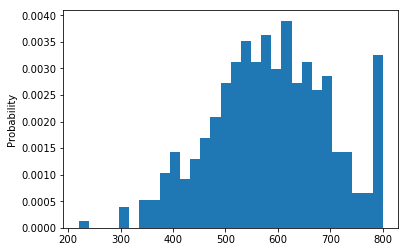

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = df[~df['gre'].isnull()]['gre']
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');
plt.show()

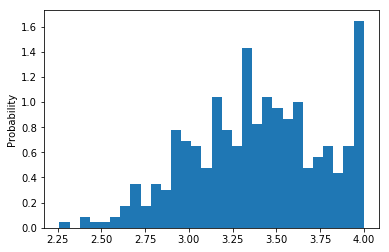

In [17]:
x = df[~df['gpa'].isnull()]['gpa']
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');
plt.show()

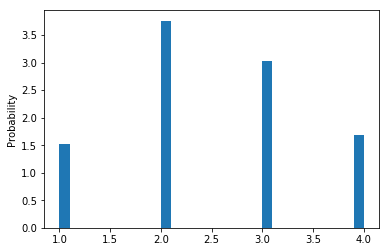

In [18]:
x = df[~df['prestige'].isnull()]['prestige']
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');
plt.show()

> ### Question 14.  How might outliers impact your analysis?

Answer: the missing data could damage the analysis

In [44]:
df[(df['gre'].isnull() | df['gpa'].isnull())].sum()

admit       0.0
gre         0.0
gpa         0.0
prestige    0.0
dtype: float64

> ### Question 15.  How will you test for outliers?

Answer: remove null values, build models and check outlier based on model

In [28]:
df = df[~(df['gre'].isnull() | df['gpa'].isnull())]

In [29]:

from sklearn import preprocessing, neighbors, model_selection
X = df[['gre', 'gpa', 'prestige']]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = df['admit']
model = neighbors.KNeighborsClassifier(n_neighbors = 1).fit(X, y)
y_hat = model.predict(X)
pd.crosstab(y_hat, y, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,269,1
1,2,125


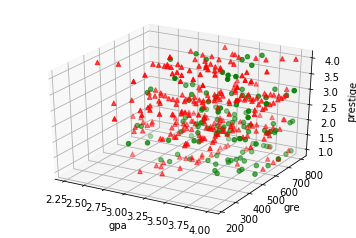

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df['admit']==1]['gpa'], df[df['admit']==1]['gre'], df[df['admit']==1]['prestige'], c='green', marker='o')
ax.scatter(df[df['admit']==0]['gpa'], df[df['admit']==0]['gre'], df[df['admit']==0]['prestige'], c='red', marker='^')
ax.set_xlabel('gpa')
ax.set_ylabel('gre')
ax.set_zlabel('prestige')
plt.show()

> ### Question 16.  What is colinearity?

Answer: TODO

C:\Users\liz38\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FBB3CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010911DD8>]], dtype=object)

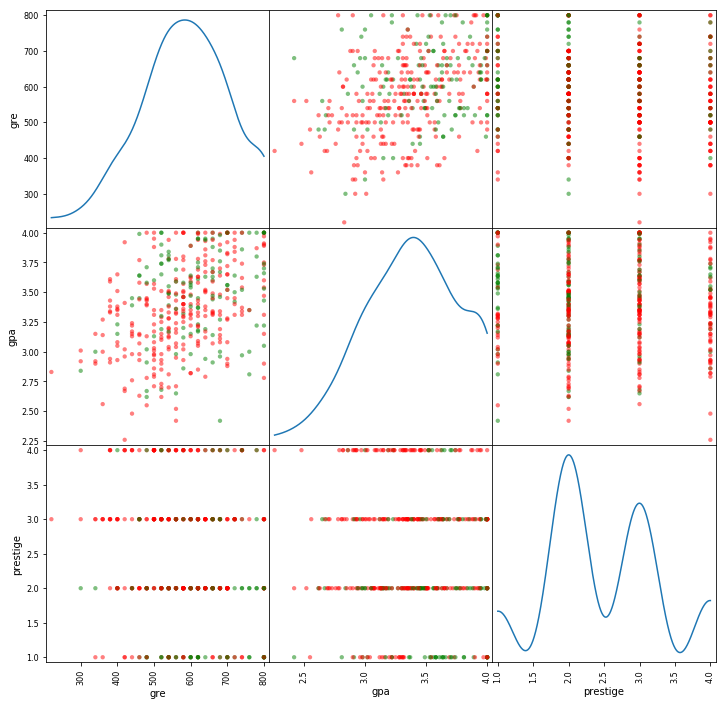

In [37]:
color = df.admit.map({1: 'green', 0: 'red'})

pd.tools.plotting.scatter_matrix(
    df[ ['gre', 'gpa', 'prestige'] ],
    diagonal = 'kde', s = 75, c = color, figsize = (12, 12)
)

> ### Question 17.  How will you test for covariance?

Answer: TODO

In [40]:
np.corrcoef(df)

array([[ 1.        ,  0.99998788,  0.9999775 , ...,  0.9999939 ,
         0.99998999,  0.99999604],
       [ 0.99998788,  1.        ,  0.99999625, ...,  0.99999896,
         0.99999929,  0.99999775],
       [ 0.9999775 ,  0.99999625,  1.        , ...,  0.99999364,
         0.99999726,  0.99999158],
       ..., 
       [ 0.9999939 ,  0.99999896,  0.99999364, ...,  1.        ,
         0.99999923,  0.99999977],
       [ 0.99998999,  0.99999929,  0.99999726, ...,  0.99999923,
         1.        ,  0.99999843],
       [ 0.99999604,  0.99999775,  0.99999158, ...,  0.99999977,
         0.99999843,  1.        ]])

> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: 
1. plot data and clean data
2. find correlation between features
3. build models to predict the results
4. test models in the testing datasets
5. summary the analysis resutls